In [1]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
from pysindy.feature_library import CustomLibrary

def plot(x, y, x_model, y_model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5.5))
    ax[0].plot(x, y, label='Data')
    ax[1].plot(x_model, y_model, label='SINDy')
    ax[0].set(xlabel='x', ylabel='y')
    ax[1].set(xlabel='x', ylabel='y')
    ax[0].legend()
    ax[1].legend()

In [2]:
pos = np.load('Jupiter_Saturn_pos.npy')
xj, yj = pos[:, 0], pos[:, 1]
xs, ys = pos[:, 2], pos[:, 3]
vel = np.load('Jupiter_Saturn_vel.npy')
acc = np.load('Jupiter_Saturn_acc.npy')
axj, ayj = acc[:, 0], acc[:, 1]
axs, ays = acc[:, 2], acc[:, 3]

Sun is assumed to be at standstill

In [3]:
functions = [lambda x1, y1, x2, y2: (x1)/((x1)**2+(y1)**2)**(3/2),
             lambda x1, y1, x2, y2: (y1)/((x1)**2+(y1)**2)**(3/2),
             lambda x1, y1, x2, y2: (x2)/((x2)**2+(y2)**2)**(3/2),
             lambda x1, y1, x2, y2: (y2)/((x2)**2+(y2)**2)**(3/2),
             lambda x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
             lambda x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)]

lib_custom = CustomLibrary(library_functions=functions)
optimizer = ps.STLSQ(threshold=1)

t = np.arange(0, pos.shape[0], 1)

model = ps.SINDy( 
        feature_library = lib_custom, 
        optimizer=optimizer,
        feature_names = ['x1', 'y1', 'x2', 'y2'])

Model were looking for: $a = Gm\cdot\frac{r}{|r|^3}$

In [4]:
model.fit(pos, t=t, x_dot=acc)
model.print()
coef = model.coefficients()
print(coef)

x1' = -39.410 f0(x1,y1,x2,y2)
y1' = -39.415 f1(x1,y1,x2,y2)
x2' = -39.502 f2(x1,y1,x2,y2)
y2' = -39.509 f3(x1,y1,x2,y2)
[[-39.40953578   0.           0.           0.           0.
    0.        ]
 [  0.         -39.41535635   0.           0.           0.
    0.        ]
 [  0.           0.         -39.5017869    0.           0.
    0.        ]
 [  0.           0.           0.         -39.50886054   0.
    0.        ]]


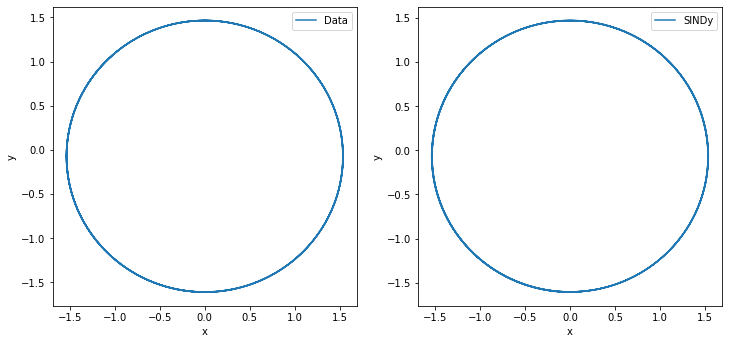

In [5]:
def f0(x1, y1, x2, y2):
    F0 = (x1)/((x1)**2+(y1)**2)**(3/2)
    return F0

def f1(x1, y1, x2, y2):
    F1 = (y1)/((x1)**2+(y1)**2)**(3/2)
    return F1

def f2(x1, y1, x2, y2):
    F2 = (x2)/((x2)**2+(y2)**2)**(3/2)
    return F2

def f3(x1, y1, x2, y2):
    F3 = (y2)/((x2)**2+(y2)**2)**(3/2)
    return F3

def f4(x1, y1, x2, y2):
    F4 = (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    return F4
    
def f5(x1, y1, x2, y2):
    F5 = (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    return F5



a1, a2, a3, a4 = coef[0,0]*f0(xj, yj, xs, ys), coef[1,1]*f1(xj, yj, xs, ys), coef[2,2]*f2(xj, yj, xs, ys), coef[3,3]*f3(xj, yj, xs, ys)

plot(axj, ayj, a1, a2)

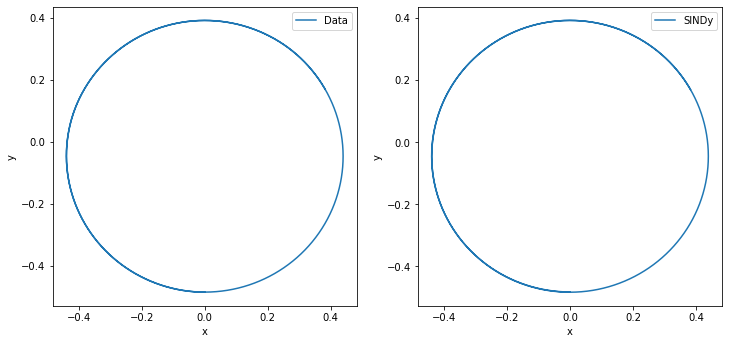

In [6]:
plot(axs, ays, a3, a4)

In [7]:
coef.shape

(4, 6)

In [8]:
a4

array([-0.48332845, -0.48332843, -0.48332839, ...,  0.16988912,
        0.16981401,  0.16973889])

In [10]:
p = np.load('sjs_pos.npy')
xsun, ysun = p[:, 0], p[:, 1]
xjup, yjup = p[:, 2], p[:, 3]
xsat, ysat = p[:, 4], p[:, 5]
v = np.load('sjs_vel.npy')
a = np.load('sjs_acc.npy')
axsun, aysun = a[:, 0], a[:, 1]
axjup, ayjup = a[:, 2], a[:, 3]
axsat, aysat = a[:, 4], a[:, 5]

In [29]:
functions = [lambda x0, y0, x1, y1, x2, y2: (x1-x0)/((x1-x0)**2+(y1-y0)**2)**(3/2),
             lambda x0, y0, x1, y1, x2, y2: (y1-y0)/((x1-x0)**2+(y1-y0)**2)**(3/2),
             lambda x0, y0, x1, y1, x2, y2: (x2-x0)/((x2-x0)**2+(y2-y0)**2)**(3/2),
             lambda x0, y0, x1, y1, x2, y2: (y2-y0)/((x2-x0)**2+(y2-y0)**2)**(3/2),
             lambda x0, y0, x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
             lambda x0, y0, x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)]

lib_custom = CustomLibrary(library_functions=functions)
optimizer = ps.STLSQ(threshold=1e-2)

td = np.arange(0, p.shape[0], 1)

model = ps.SINDy( 
        feature_library = lib_custom, 
        optimizer=optimizer,
        feature_names = ['x0', 'y0', 'x1', 'y1', 'x2', 'y2'])

In [30]:
model.fit(p, t=td, x_dot=a)
model.print()
coef = model.coefficients()
print(coef)

x0' = 0.038 f0(x0,y0,x1,y1,x2,y2) + 0.011 f2(x0,y0,x1,y1,x2,y2)
y0' = 0.038 f1(x0,y0,x1,y1,x2,y2) + 0.011 f3(x0,y0,x1,y1,x2,y2)
x1' = -39.479 f0(x0,y0,x1,y1,x2,y2) + 0.019 f1(x0,y0,x1,y1,x2,y2) + 0.001 f2(x0,y0,x1,y1,x2,y2) + 0.010 f4(x0,y0,x1,y1,x2,y2)
y1' = -0.019 f0(x0,y0,x1,y1,x2,y2) + -39.479 f1(x0,y0,x1,y1,x2,y2) + -0.001 f3(x0,y0,x1,y1,x2,y2) + 0.012 f5(x0,y0,x1,y1,x2,y2)
x2' = -39.478 f2(x0,y0,x1,y1,x2,y2) + 0.007 f3(x0,y0,x1,y1,x2,y2) + -0.038 f4(x0,y0,x1,y1,x2,y2)
y2' = -0.007 f2(x0,y0,x1,y1,x2,y2) + -39.479 f3(x0,y0,x1,y1,x2,y2) + -0.037 f5(x0,y0,x1,y1,x2,y2)
[[ 3.76854171e-02  0.00000000e+00  1.12897107e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.76863471e-02  0.00000000e+00  1.12908508e-02
   0.00000000e+00  0.00000000e+00]
 [-3.94786531e+01  1.85344489e-02  1.12069421e-03 -3.37213698e-04
   1.01449601e-02  0.00000000e+00]
 [-1.86697461e-02 -3.94789102e+01  3.03033782e-04 -1.30999725e-03
   0.00000000e+00  1.19420494e-02]
 [ 1.00624362e-04 -

In [32]:
def f0(x0, y0, x1, y1, x2, y2):
    F0 = (x1-x0)/((x1-x0)**2+(y1-y0)**2)**(3/2)
    return F0

def f1(x0, y0, x1, y1, x2, y2):
    F1 = (y1-y0)/((x1-x0)**2+(y1-y0)**2)**(3/2)
    return F1

def f2(x0, y0, x1, y1, x2, y2):
    F2 = (x2-x0)/((x2-x0)**2+(y2-y0)**2)**(3/2)
    return F2

def f3(x0, y0, x1, y1, x2, y2):
    F3 = (y2-y0)/((x2-x0)**2+(y2-y0)**2)**(3/2)
    return F3

def f4(x0, y0, x1, y1, x2, y2):
    F4 = (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    return F4
    
def f5(x0, y0, x1, y1, x2, y2):
    F5 = (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    return F5



a0 = coef[0, 0]*f0(xsun,ysun,xjup,yjup,xsat,ysat) + coef[0, 2]*f2(xsun,ysun,xjup,yjup,xsat,ysat)
a1 = coef[1, 1]*f1(xsun,ysun,xjup,yjup,xsat,ysat) + coef[1, 3]*f3(xsun,ysun,xjup,yjup,xsat,ysat)
a2 = coef[2, 0]*f0(xsun,ysun,xjup,yjup,xsat,ysat) + coef[2, 2]*f2(xsun,ysun,xjup,yjup,xsat,ysat) + coef[2, 3]*f4(xsun,ysun,xjup,yjup,xsat,ysat)
a3 = coef[3, 1]*f1(xsun,ysun,xjup,yjup,xsat,ysat) + coef[3, 2]*f3(xsun,ysun,xjup,yjup,xsat,ysat) + coef[3, 3]*f5(xsun,ysun,xjup,yjup,xsat,ysat)
a4 = coef[4, 2]*f2(xsun,ysun,xjup,yjup,xsat,ysat) + coef[4, 4]*f4(xsun,ysun,xjup,yjup,xsat,ysat)
a5 = coef[5, 3]*f3(xsun,ysun,xjup,yjup,xsat,ysat) + coef[5, 5]*f5(xsun,ysun,xjup,yjup,xsat,ysat)

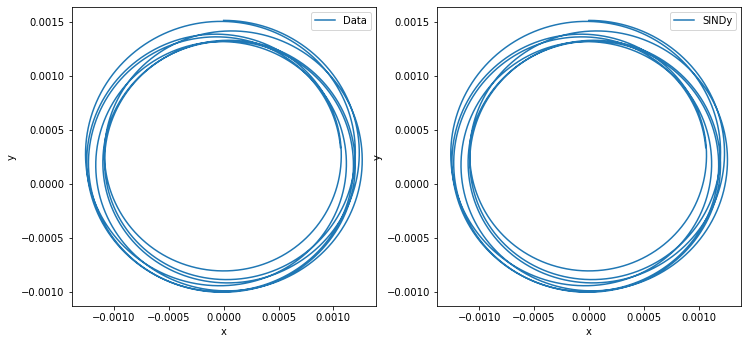

In [36]:
plot(axsun, aysun, a0, a1)
#plt.savefig('sunsindysun.png')

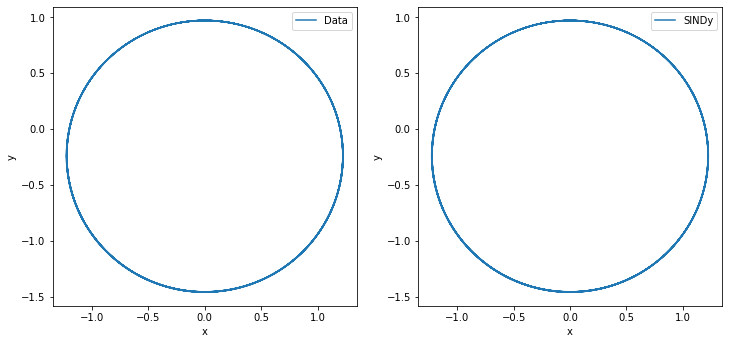

In [37]:
plot(axjup, ayjup, a2, a3)
#plt.savefig('jupsindyjup.png')

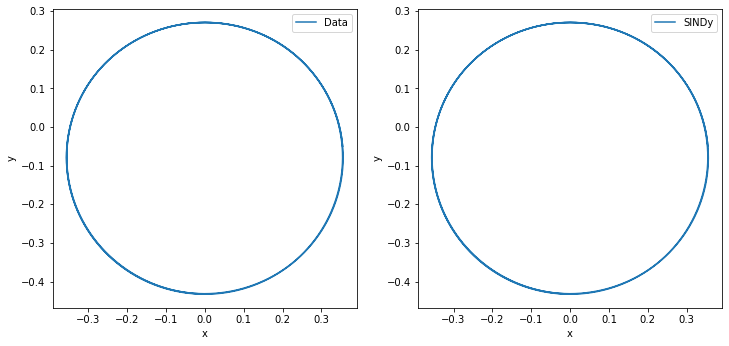

In [39]:
plot(axsat, aysat, a4, a5)
#plt.savefig('satsindysat.png')